In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [3]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [7]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [11]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [12]:
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [13]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [14]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`

Measurement = Base.classes.measurement
Station = Base.classes.station  

In [15]:
# Create a session
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [17]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

most_recent_date


('2017-08-23',)

In [49]:
# Calculate the date one year from the last date in data set.
year_later = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_later


datetime.date(2016, 8, 23)

In [56]:
# Create a query that collects only the date and precipitation for the last year of data without passing the date as a variable 
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_later).all()
for date, prcp in results:
    print(f"Date: {date}, Precipitation: {prcp}")

Date: 2016-08-23, Precipitation: 0.0
Date: 2016-08-24, Precipitation: 0.08
Date: 2016-08-25, Precipitation: 0.08
Date: 2016-08-26, Precipitation: 0.0
Date: 2016-08-27, Precipitation: 0.0
Date: 2016-08-28, Precipitation: 0.01
Date: 2016-08-29, Precipitation: 0.0
Date: 2016-08-30, Precipitation: 0.0
Date: 2016-08-31, Precipitation: 0.13
Date: 2016-09-01, Precipitation: 0.0
Date: 2016-09-02, Precipitation: 0.0
Date: 2016-09-03, Precipitation: 0.0
Date: 2016-09-04, Precipitation: 0.03
Date: 2016-09-05, Precipitation: None
Date: 2016-09-06, Precipitation: None
Date: 2016-09-07, Precipitation: 0.05
Date: 2016-09-08, Precipitation: 0.0
Date: 2016-09-09, Precipitation: 0.03
Date: 2016-09-10, Precipitation: 0.0
Date: 2016-09-11, Precipitation: 0.05
Date: 2016-09-12, Precipitation: 0.0
Date: 2016-09-13, Precipitation: 0.02
Date: 2016-09-14, Precipitation: 1.32
Date: 2016-09-15, Precipitation: 0.42
Date: 2016-09-16, Precipitation: 0.06
Date: 2016-09-17, Precipitation: 0.05
Date: 2016-09-18, Preci

In [57]:
#  Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['date', 'precipitation'])


In [58]:
# Sort the dataframe by date
df_sorted = df.sort_values(by='date')
df_sorted.head()

,date,precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


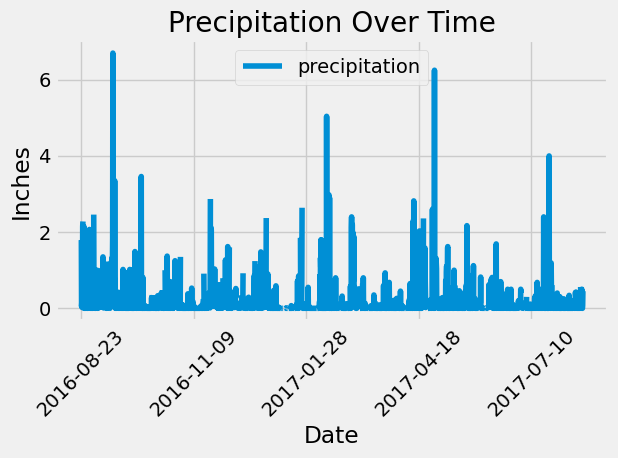

In [59]:
# Use Pandas Plotting with Matplotlib to plot the data

df_sorted.plot(x='date', y='precipitation', kind='line')
plt.title('Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [61]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = df_sorted['precipitation'].describe()

# Print the summary statistics
print(summary_statistics)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64


# Exploratory Station Analysis

In [45]:
# Design a query to calculate the total number of stations in the dataset
total_count = session.query(Station).distinct().count()
print(total_count)


9


In [70]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
total_count = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
total_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [73]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
top_station = total_count[0][0]

sel = [
       func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
top_station_temps = session.query(*sel).\
    filter(Measurement.station == top_station).first()
top_station_temps

(54.0, 85.0, 71.66378066378067)

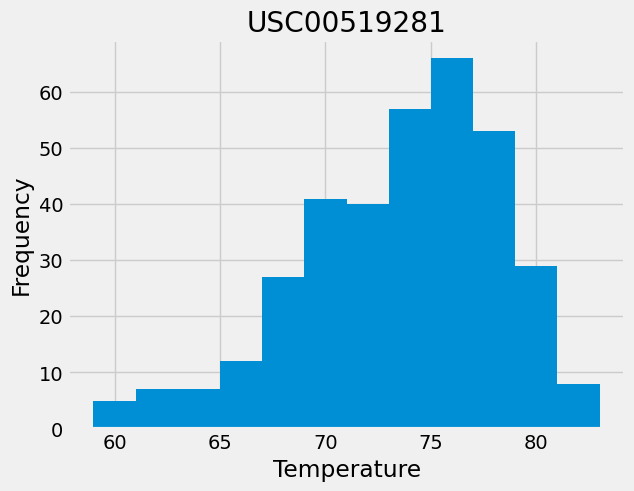

In [84]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).filter(Measurement.date >= year_later).filter(Measurement.station == top_station).all()
df2 = pd.DataFrame(results)
df2.hist(bins=12)
plt.title('USC00519281')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


# Close Session

In [16]:
# Close Session
session.close()
